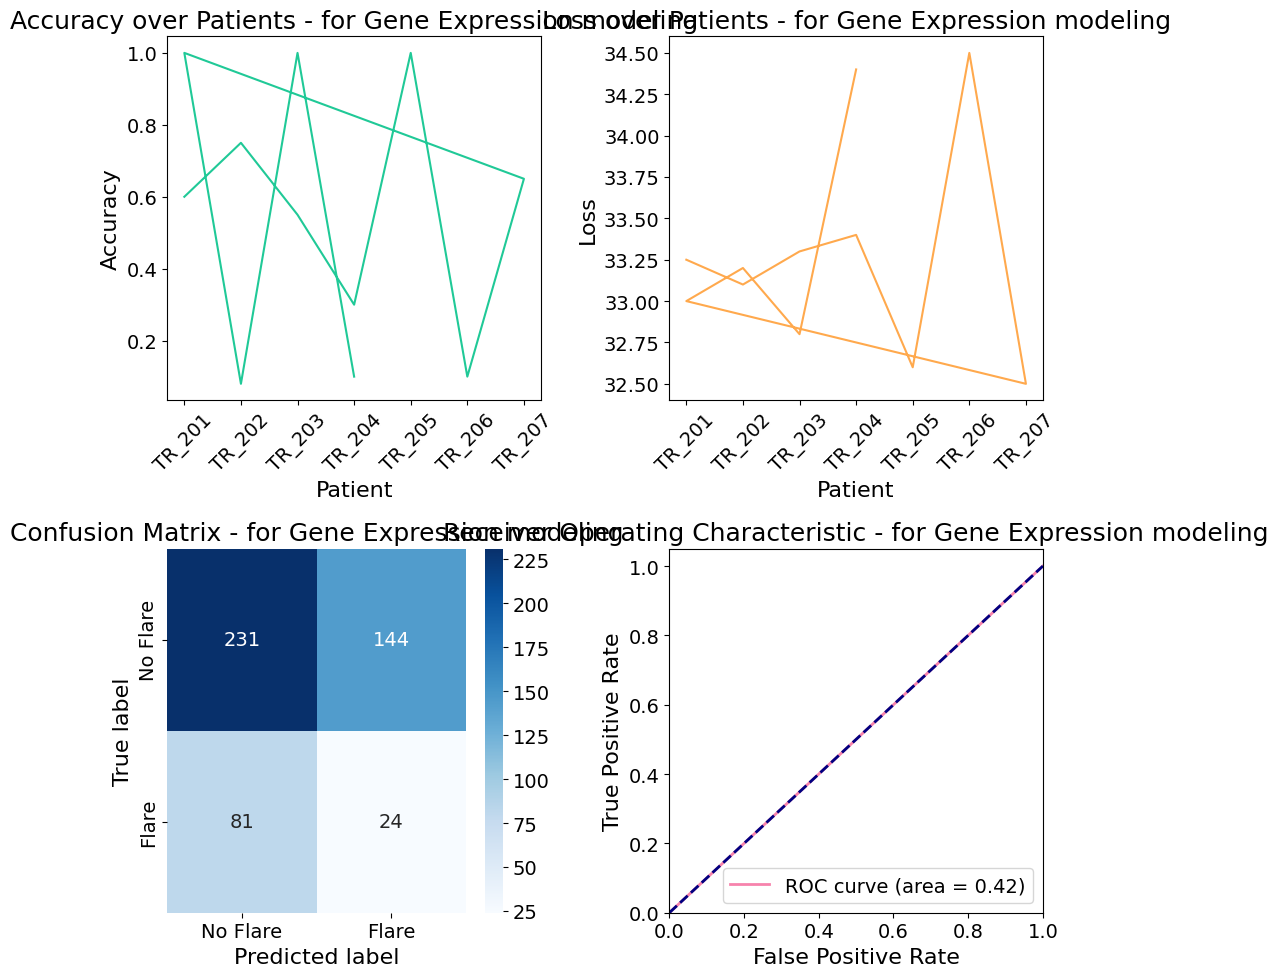

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

# Increase default font sizes
plt.rcParams.update({'font.size': 14,
                     'axes.labelsize': 16,
                     'axes.titlesize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14,
                     'legend.fontsize': 14,
                     'figure.titlesize': 20})

# Sample data (you'll need to replace this with your actual data)
patients = ['TR_201', 'TR_202', 'TR_203', 'TR_204', 'TR_205', 'TR_206', 'TR_207', 'TR_201', 'TR_202', 'TR_203', 'TR_204', 'TR_205']
accuracy = [0.6, 0.75, 0.55, 0.3, 1.0, 0.1, 0.65, 1.0, 0.08, 1.0, 0.1]
loss = [33.25, 33.1, 33.3, 33.4, 32.6, 34.5, 32.5, 33.0, 33.2, 32.8, 34.4]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy over Patients
axs[0, 0].plot(patients[:11], accuracy, color='#20c997')
axs[0, 0].set_title('Accuracy over Patients - for Gene Expression modeling')
axs[0, 0].set_xlabel('Patient')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].tick_params(axis='x', rotation=45)

# Loss over Patients
axs[0, 1].plot(patients[:11], loss, color='#ffa94d')
axs[0, 1].set_title('Loss over Patients - for Gene Expression modeling')
axs[0, 1].set_xlabel('Patient')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].tick_params(axis='x', rotation=45)

# Confusion Matrix
cm = np.array([[231, 144], [81, 24]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix - for Gene Expression modeling')
axs[1, 0].set_xlabel('Predicted label')
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xticklabels(['No Flare', 'Flare'])
axs[1, 0].set_yticklabels(['No Flare', 'Flare'])

# ROC Curve
fpr = np.linspace(0, 1, 100)
tpr = np.linspace(0, 1, 100)
roc_auc = 0.42

axs[1, 1].plot(fpr, tpr, color='#f783ac', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('Receiver Operating Characteristic - for Gene Expression modeling')
axs[1, 1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.metrics import f1_score

# Load the CSV file
file_path = '/content/evaluation_results_4.csv'
df = pd.read_csv(file_path)

# Function to calculate F1 score from confusion matrix
def calculate_f1(conf_matrix_str):
    conf_matrix = eval(conf_matrix_str)
    tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    if tp + fp == 0 or tp + fn == 0:
        return 0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# Apply the function to each row in the DataFrame
df['F1_Score'] = df['Confusion_Matrix'].apply(calculate_f1)

# Find the row with the maximum F1 score
best_f1_row = df.loc[df['F1_Score'].idxmax()]

best_f1_row[['Confusion_Matrix', 'F1_Score']]

FileNotFoundError: [Errno 2] No such file or directory: '/content/evaluation_results_4.csv'

In [ ]:
df[df['data']=='Microbial Abundances'].sort_values(by='F1_Score', ascending=False).head(1)

In [ ]:
df.sort_values(by='F1_Score', ascending=False).head(1)

In [ ]:
0.07*353

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


fs = 24

def plot_confusion_matrix_and_metrics(cm, labels):
    # Calculate metrics
    cm=cm.astype(int)
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Create a dataframe for metrics
    metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Score"])

    # Plot confusion matrix and metrics
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0])
    ax[0].set_xlabel('Predicted', fontsize=16)
    ax[0].set_ylabel('Actual', fontsize=16)
    ax[0].set_title('Confusion Matrix', fontsize=fs)
    ax[0].tick_params(axis='both', which='major', labelsize=16)

    # Plot metrics
    sns.barplot(x="Metric", y="Score", data=metrics_df, palette="Blues_d", ax=ax[1])
    ax[1].set_ylim(0, 1)
    ax[1].set_title("Performance Metrics", fontsize=fs)
    ax[1].set_xlabel('', fontsize=16)
    ax[1].set_ylabel('Score', fontsize=16)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    sns.despine(ax=ax[1])  # Removes the rectangle around the plot

    plt.tight_layout()
    plt.show()

# Example usage
cm = np.array([[322.0, 13.0], [41.0, 4.0]])
labels = ["No Flare", "Flare"]

plot_confusion_matrix_and_metrics(cm, labels)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fs = 24

def plot_feature_importances(feature_importances_string, n_top=15):
    # Parse the feature importances string
    lines = feature_importances_string.split('\n')
    features = []
    importances = []
    for line in lines:
        if ':' in line:
            feature, importance = line.split(': ')
            features.append(feature)  # Keep the full feature name
            importances.append(float(importance.strip('()')))

    # Sort features by importance
    sorted_idx = np.argsort(importances)[::-1]  # Sort in descending order
    top_features = np.array(features)[sorted_idx][:n_top]  # Take the top n features
    top_importances = np.array(importances)[sorted_idx][:n_top]

    # Create the plot
    plt.figure(figsize=(12, 10))
    sns.set_style("white")  # Set style to 'white' to remove the grid

    # Plot horizontal bars
    ax = sns.barplot(x=top_importances, y=top_features, palette="rocket")

    # Customize the plot
    plt.title('Top {} Most Important Features'.format(n_top), fontsize=fs, pad=20)
    plt.xlabel('Feature Importance', fontsize=fs)
    plt.ylabel('Features', fontsize=fs)

    # Increase font size of tick labels
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Add value labels to the end of each bar
    for i, v in enumerate(top_importances):
        ax.text(v, i, f' {v:.4f}', va='center', fontsize=10)

    # Remove the top and right spines
    sns.despine(left=True, bottom=True)

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
# Your feature importances string
feature_importances = """
MEFV_ENSG00000103313_ENST00000219596: (0.047141638884061886)
ATG16L2_ENSG00000168010_ENST00000321297: (0.033536266607478576)
OSM_ENSG00000099985_ENST00000215781: (0.028376140294807756)
IFNA1_ENSG00000197919_ENST00000276927: (0.01961695491869878)
NLRP3_ENSG00000162711_ENST00000336119: (0.019018466288959503)
FFAR3_ENSG00000185897_ENST00000327809: (0.017898053835835887)
NCF4_ENSG00000100365_ENST00000248899: (0.01789795807766317)
IFNB1_ENSG00000171855_ENST00000380232: (0.017716437117808927)
PRLR_ENSG00000113494_ENST00000618457: (0.01533976153235885)
AQP8_ENSG00000103375_ENST00000219660: (0.01510545369174257)
CDKAL1_ENSG00000145996_ENST00000274695: (0.014279216531392955)
GSDMB_ENSG00000073605_ENST00000418519: (0.013657025989497947)
BATF_ENSG00000156127_ENST00000286639: (0.013656499901209406)
GAPDH_ENSG00000111640_ENST00000396861: (0.013507217541538191)
PLEKHO2_ENSG00000241839_ENST00000323544: (0.013422245461622358)
CCR8_ENSG00000179934_ENST00000326306: (0.013143424064278526)
IFNW1_ENSG00000177047_ENST00000380229: (0.012685242587988527)
NTS_ENSG00000133636_ENST00000256010: (0.012235373845113766)
CSF3R_ENSG00000119535_ENST00000373106: (0.012022432985689445)
IL11_ENSG00000095752_ENST00000264563: (0.011512009514020522)
GUCA2A_ENSG00000197273_ENST00000357001: (0.011192468097643857)
CA2_ENSG00000104267_ENST00000285379: (0.010501389174584664)"""

# Call the function
plot_feature_importances(feature_importances)